In [3]:
# コード 4-1

url = 'https://raw.githubusercontent.com/makaishi2/samples/main/data/titanic-v2.csv'
!wget $url

--2025-08-13 16:14:05--  https://raw.githubusercontent.com/makaishi2/samples/main/data/titanic-v2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109153 (107K) [text/plain]
Saving to: ‘titanic-v2.csv’

titanic-v2.csv      100%[===================>] 106.59K  --.-KB/s    in 0.02s   

2025-08-13 16:14:05 (4.31 MB/s) - ‘titanic-v2.csv’ saved [109153/109153]



# 新しいセクション

In [4]:
# コード 4-2

# ファイル名の定義
csv_fn = 'titanic-v2.csv'

# 先頭を確認
!head -3 $csv_fn

pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1,'Allen, Miss. Elisabeth Walton',female,29,0,0,24160,211.3375,B5,S,2,?,'St Louis, MO'
1,1,'Allison, Master. Hudson Trevor',male,0.9167,1,2,113781,151.55,'C22 C26',S,11,?,'Montreal, PQ / Chesterville, ON'


In [5]:
# コード 4-3

# pandas用ライブラリのインポート
import pandas as pd

# データ読み込み　その1
df = pd.read_csv(
    csv_fn,
    na_values = '?',
    quotechar = "'"
    )


ParserError: Error tokenizing data. C error: Expected 14 fields in line 130, saw 15


In [6]:
# コード 4-4

# 問題の起きた行を確認
!head -130 $csv_fn | tail -1

1,0,'Gee, Mr. Arthur H',male,47,0,0,111320,38.5,E63,S,?,275,'St Anne\'s-on-Sea, Lancashire'


In [7]:
# コード 4-5

# データ読み込み　その2
df = pd.read_csv(
    csv_fn,
    na_values = '?',
    quotechar = "'",
    escapechar = '\\'
)

# 結果確認
display(df.head(1))

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"


In [8]:
# コード 4-6

# データ型確認（3.3.4項）
df.dtypes

,0
pclass,int64
survived,int64
name,object
sex,object
age,float64
sibsp,int64
parch,int64
ticket,object
fare,float64
cabin,object


In [9]:
# コード 4-7

# 項目「body」の一部を表示
df[['body']].head()

,body
0,NaN
1,NaN
2,NaN
3,135.0
4,NaN


In [10]:
# コード 4-8

# 3度目のデータ読み込み
df = pd.read_csv(
    csv_fn,
    na_values = '?',
    quotechar = "'",
    escapechar = '\\',
    # 項目「body」を文字列型として読み込むよう指定
    dtype = {'body': object}
)

# 結果確認（データ型）
print(df.dtypes)

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body          object
home.dest     object
dtype: object


In [11]:
# コード 4-9

# 項目「body」の先頭表示
display(df[['body']].head())

,body
0,NaN
1,NaN
2,NaN
3,135
4,NaN


In [12]:
# コード 4-10

# 項目名変更（3.3.2 項）

columns = [
    '客室クラス', '生存状況', '氏名', '性別',
    '年齢', '兄弟_配偶者数', '親_子供数',
    '乗船券番号', '運賃', '客室番号', '乗船港',
    '救命ボート番号', '遺体識別番号', '自宅または目的地'
]
df.columns = columns

# 結果確認
display(df.head(1))

,客室クラス,生存状況,氏名,性別,年齢,兄弟_配偶者数,親_子供数,乗船券番号,運賃,客室番号,乗船港,救命ボート番号,遺体識別番号,自宅または目的地
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"


In [13]:
# コード 4-11

# 欠損値の確認（3.3.3 項）
print(df.isnull().sum())

客室クラス          0
生存状況           0
氏名             0
性別             0
年齢           263
兄弟_配偶者数        0
親_子供数          0
乗船券番号          0
運賃             1
客室番号        1014
乗船港            2
救命ボート番号      823
遺体識別番号      1188
自宅または目的地     564
dtype: int64


In [14]:
# コード 4-12

# 数値データの統計量計算（3.3.5 項）
df.describe()

,客室クラス,生存状況,年齢,兄弟_配偶者数,親_子供数,運賃
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [15]:
# コード 4-13

# 文字列型データの統計量確認（3.3.5 項）
df.describe(include=['O'])

,氏名,性別,乗船券番号,客室番号,乗船港,救命ボート番号,遺体識別番号,自宅または目的地
count,1309,1309,1309,295,1307,486,121,745
unique,1307,2,929,186,3,27,121,369
top,"Kelly, Mr. James",male,CA. 2343,C23 C25 C27,S,13,135,"New York, NY"
freq,2,843,11,6,914,39,1,64


In [16]:
# コード 4-14

# 出現回数をカウントしたい項目を抽出
df2 = df[['客室クラス', '生存状況', '性別', '乗船港']]

# 値の出現回数（3.3.6 項）
for c in list(df2.columns):
    print(c)
    print(df[c].value_counts())
    print()

客室クラス
客室クラス
3    709
1    323
2    277
Name: count, dtype: int64

生存状況
生存状況
0    809
1    500
Name: count, dtype: int64

性別
性別
male      843
female    466
Name: count, dtype: int64

乗船港
乗船港
S    914
C    270
Q    123
Name: count, dtype: int64



In [17]:
# コード 4-15



# 客室クラスごとの修正（3.4.5 項）
# 数値型の列のみを選択して平均値を計算
numeric_cols = df.select_dtypes(include=['number']).columns
print(df.groupby('客室クラス')[numeric_cols].mean())

       客室クラス      生存状況         年齢   兄弟_配偶者数     親_子供数         運賃
客室クラス                                                           
1        1.0  0.619195  39.159918  0.436533  0.365325  87.508992
2        2.0  0.429603  29.506705  0.393502  0.368231  21.179196
3        3.0  0.255289  24.816367  0.568406  0.400564  13.302889


In [18]:
# コード 4-16

# 「客室クラス」「乗船港」を軸とした出現頻度分析
df_crosstab = pd.crosstab(
    index = df['客室クラス'],
    columns = df['乗船港'],
    margins = True
)

# 結果確認
display(df_crosstab)

乗船港,C,Q,S,All
客室クラス,,,,
1,141,3,177,321
2,28,7,242,277
3,101,113,495,709
All,270,123,914,1307


In [19]:
# コード 4-17

# 「性別」と「客室クラス」を軸とした、「生存状況」のクロス集計
df_pivot = df.pivot_table(
    # 「性別」「客室クラス」の2軸で分析
    index = '性別', columns = '客室クラス',
    # 分析対象項目は「生存状況」　集約関数は「平均」
    values = '生存状況', aggfunc ='mean'
)

# 結果確認
display(df_pivot)

客室クラス,1,2,3
性別,,,
female,0.965278,0.886792,0.490741
male,0.340782,0.146199,0.152130


In [21]:
# コード 4-18　その1

# 日本語化ライブラリ導入
!pip install japanize-matplotlib | tail -n 1

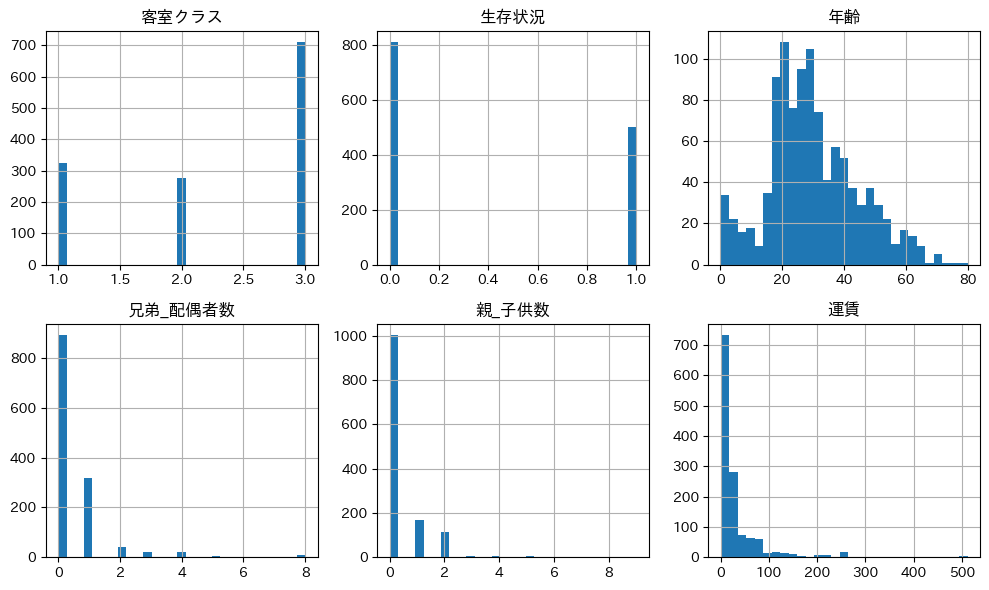

In [22]:
# コード 4-18　その2

# Matplotlib ライブラリインポート
import matplotlib.pyplot as plt

# Matplotlib 日本語対応ライブラリのインポート
import japanize_matplotlib

plt.rcParams['figure.figsize'] = (10, 6)

# データフレームの数値項目でヒストグラム表示（3.5.2 項）
df.hist(bins = 29, layout = (2, 3))
plt.tight_layout()
plt.show()

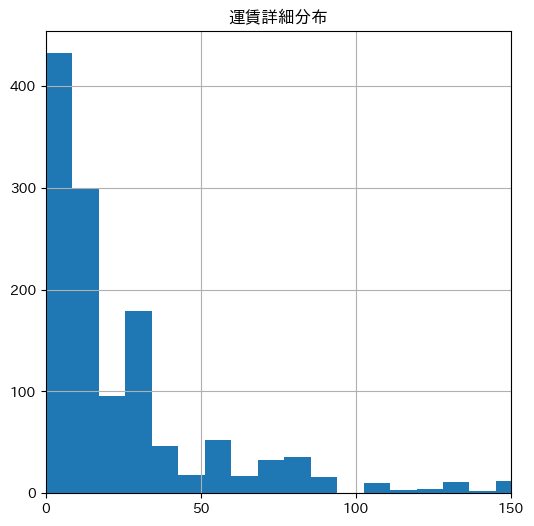

In [23]:
# コード 4-19　運賃を150以下に限定して分析

import matplotlib.pyplot as plt
import numpy as np # np.arange() を使うためにNumpyをインポート

# 運賃の詳細分布
plt.rcParams['figure.figsize'] = (6, 6)
df['運賃'].hist(bins = 60)
plt.xlim(0 ,150)

# グラフのメモリを50おきにする
plt.xticks(np.arange(0, 151, 50))

plt.title('運賃詳細分布')
plt.show()

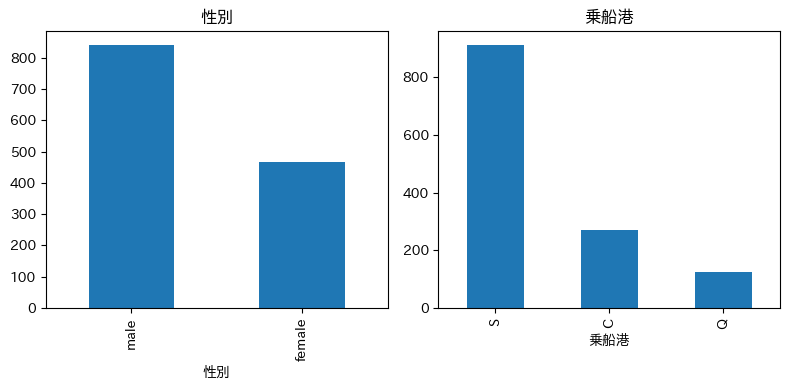

In [24]:
# コード 4-20

plt.rcParams['figure.figsize'] = (8, 4)

# 非数値項目の度数分布（3.5.3 項）
df2 = df[['性別', '乗船港']]

for i, c in enumerate(df2.columns):
    ax = plt.subplot(1, 2, i+1)
    df2[c].value_counts().plot(
        kind = 'bar', title = c, ax = ax
    )

# レイアウトの調整
plt.tight_layout()
plt.show()

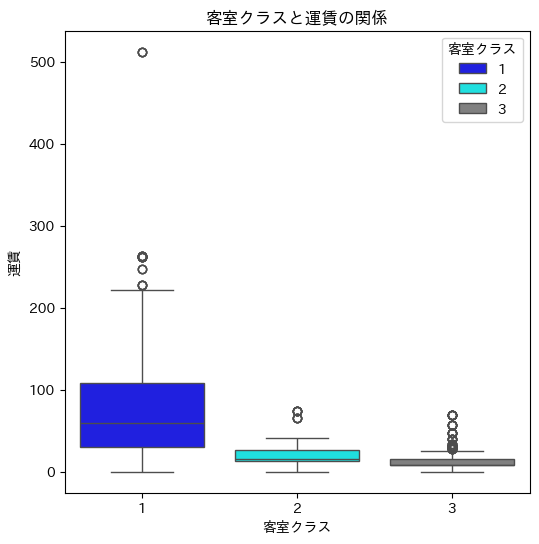

In [25]:
# コード 4-21　「客室クラス」と「運賃」の関係

plt.rcParams['figure.figsize'] = (6, 6)


# seaborn のインポート
import seaborn as sns

# 箱ひげ図の描画（3.5.4 項）
sns.boxplot(
    x = '客室クラス', y = '運賃', data = df,
    hue='客室クラス',
    palette = ['blue', 'cyan', 'grey']
)
plt.title('客室クラスと運賃の関係')
plt.show()

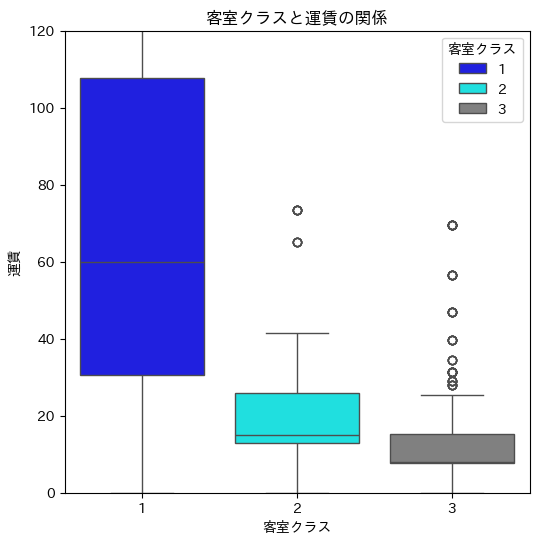

In [26]:
# コード 4-22　「客室クラス」と「運賃」の関係（y軸スケール見直し後）

plt.rcParams['figure.figsize'] = (6, 6)


# seaborn のインポート
import seaborn as sns

# 箱ひげ図の描画（3.5.4 項）
sns.boxplot(
    x = '客室クラス', y = '運賃', data = df,
    hue='客室クラス',
    palette = ['blue', 'cyan', 'grey']
)
plt.title('客室クラスと運賃の関係')

# y軸の上限を120に変更する
plt.ylim(0, 120)
plt.show()

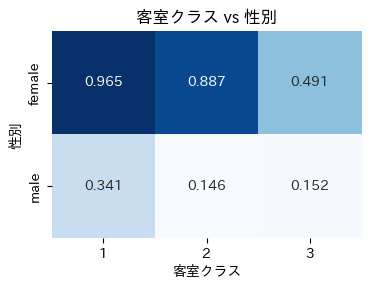

In [27]:
# コード 4-23　ヒートマップで可視化する

# 「性別」「客室クラス」を軸とした「生存状況」クロス集計の可視化
df_pivot = df.pivot_table(
    # 「性別」「客室クラス」の2軸で分析
    index = '性別', columns = '客室クラス',
    # 分析対象項目は「生存状況」　集約関数は「平均」
    values = '生存状況', aggfunc = 'mean'
)

# ヒートマップ表示
plt.rcParams['figure.figsize'] = (4, 4)
sns.heatmap(
    df_pivot, square = True, annot = True,
    fmt = '.03f', cmap = 'Blues', cbar = False
)

xlabel = df_pivot.columns.name
ylabel = df_pivot.index.name
plt.title(xlabel + ' vs ' + ylabel)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

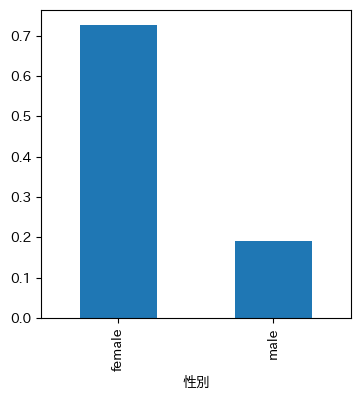

In [28]:
# コード 4-24　「生存状況」と「性別」の関係

plt.rcParams['figure.figsize'] = (4, 4)

# 「生存状況」と「性別」の関係
df.groupby('性別')['生存状況'].mean().plot(kind = 'bar')
plt.show()

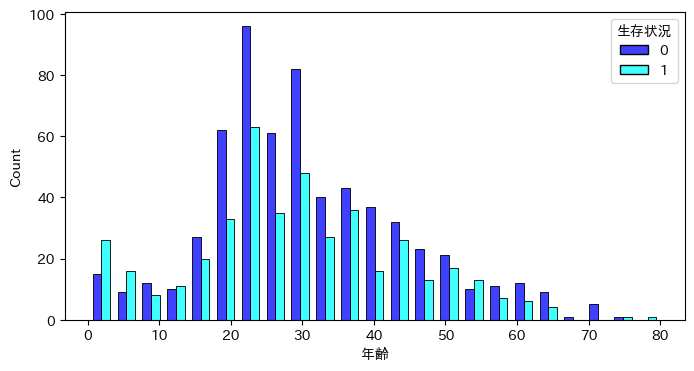

In [29]:
# コード 4-25　「生存状況」と「年齢」の関係
plt.rcParams['figure.figsize'] = (8, 4)

# 「生存状況」と「年齢」の関係
sns.histplot(
    data = df, x = '年齢', hue = '生存状況',
    palette = ['blue', 'cyan'],
    multiple = 'dodge',
    shrink = 0.7
)

plt.show()

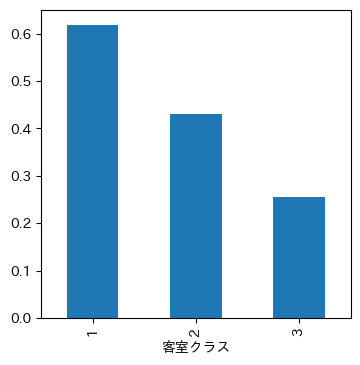

In [30]:
# コード 4-26

plt.rcParams['figure.figsize'] = (4, 4)

# 「生存状況」と「客室クラス」の関係
df.groupby('客室クラス')['生存状況'].mean().plot(kind = 'bar')
plt.show()

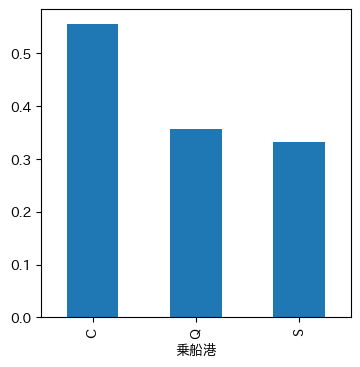

In [31]:
# コード 4-27

plt.rcParams['figure.figsize'] = (4, 4)

# 「生存状況」と「乗船港」の関係
df.groupby('乗船港')['生存状況'].mean().plot(kind = 'bar')
plt.show()

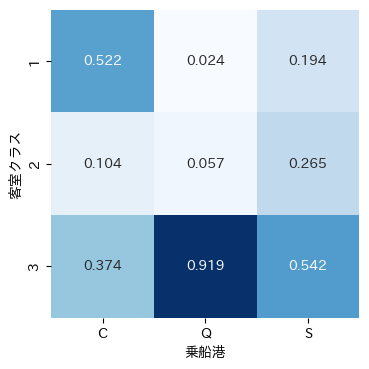

In [32]:
# コード 4-28　「客室クラス」「乗船港」を軸とした出現頻度分析

# 「客室クラス」「乗船港」を軸とした出現頻度分析
# 列を軸に正規化する
df_crosstab = pd.crosstab(
    index = df['客室クラス'],
    columns = df['乗船港'],
    normalize = 'columns'
)

# ヒートマップ表示
plt.rcParams['figure.figsize'] = (4, 4)
sns.heatmap(
    df_crosstab, square = True, annot = True,
    fmt = '.03f', cmap = 'Blues', cbar = False
)
plt.show()

In [34]:
# コード 4-29

# 項目「救命ボート」を追加
df['救命ボート'] = df['救命ボート番号'].notnull()

# 結果確認
display(df[['救命ボート番号', '救命ボート']].head(3))

,救命ボート番号,救命ボート
0,2,True
1,11,True
2,NaN,False


In [35]:
# コード 4-30

# 「救命ボート」「生存状況」を軸とした出現頻度分析
df_crosstab = pd.crosstab(
    index = df['生存状況'],
    columns = df['救命ボート']
)

# 結果確認
display(df_crosstab)

救命ボート,False,True
生存状況,,
0,800,9
1,23,477


In [36]:
# コード 4-31

# 救命ボートなしで助かった人（23人）
# queryメソッドを用いた深掘り分析（3.6.6 項）
x1 = df.query(
    ' 生存状況 == 1 and 救命ボート == False'
)

# 結果の一部確認
display(x1[[
    '客室クラス', '生存状況', '氏名', '性別', '年齢',
    '救命ボート番号']].head(3)
)

,客室クラス,生存状況,氏名,性別,年齢,救命ボート番号
192,1,1,"Lurette, Miss. Elise",female,58.0,NaN
358,2,1,"Bystrom, Mrs. (Karolina)",female,42.0,NaN
395,2,1,"Doling, Miss. Elsie",female,18.0,NaN


In [38]:
# コード 4-32

# 救命ボートなしで助かった人の性別分布
print(x1['性別'].value_counts())
print()

# 救命ボートなしで助かった人の割合を性別に集計
x11 = df.query('救命ボート == False')
print(x11.groupby('性別')['生存状況'].mean())

性別
female    21
male       2
Name: count, dtype: int64

性別
female    0.142857
male      0.002959
Name: 生存状況, dtype: float64


In [39]:
# コード 4-33　救命ボートに乗れたのに助からなかった人

# 救命ボートに乗れたのに助からなかった人（9名）
# queryメソッドを用いた深掘り分析（3.6.6 項）
x2 = df.query(
    ' 生存状況 == 0 and 救命ボート == True'
)

# 結果の一部確認
display(x2[[
    '客室クラス', '生存状況', '氏名', '性別', '年齢',
    '救命ボート番号']].head(3))

,客室クラス,生存状況,氏名,性別,年齢,救命ボート番号
19,1,0,"Beattie, Mr. Thomson",male,36.0,A
166,1,0,"Hoyt, Mr. William Fisher",male,NaN,14
544,2,0,"Renouf, Mr. Peter Henry",male,34.0,12


In [40]:
# コード 4-34

# 救命ボートに乗れたのに助からなかった人の性別分布
print(x2['性別'].value_counts())
print()

# 救命ボートに乗れたのに助からなかった人の割合を性別に集計
x22 = df.query('救命ボート == True')
print(1 - x22.groupby('性別')['生存状況'].mean())

性別
male      8
female    1
Name: count, dtype: int64

性別
female    0.003135
male      0.047904
Name: 生存状況, dtype: float64
